<a href="https://colab.research.google.com/github/marycarmenvv/ML_modulo2_UsoDeFrameWork_A00828570/blob/main/Copy_of_UsoDeFramework_A00828570.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Módulo 2. Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución. (Portafolio Implementación)**
# María del Carmen Vargas Villarreal A00828570
# Machine Learning: Decision Trees

Importamos librerias necesarias

In [ ]:
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import seaborn as sns
import numpy as np
import pandas as pd

Leemos base de datos: Iris.csv

In [ ]:
df_iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Separamos las variables y etiquetas

In [ ]:
# Etiqueta
Y_iris = df_iris['Species']

# Variables
X_iris = df_iris.values[:, 1:5] # 5-1


Dividimos en training y test set

In [ ]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, Y_iris, test_size=0.3, random_state=42)


Implementación del método DecisionTreeClassifier 

In [ ]:
clf_tree_iris = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

# Train Decision Tree Classifer
clf_tree_iris = clf_tree_iris.fit(X_train_iris, y_train_iris)

Predict the response for test dataset

In [ ]:
test_pred_decision_tree = clf_tree_iris.predict(X_test_iris)


Verificación de predicciones

In [ ]:
#Predicción 1
print(clf_tree_iris.predict([[4.6, 3.2, 1.5, 0.3]]))

['Iris-setosa']


In [ ]:
#Predicción 2
print(clf_tree_iris.predict([[6.7, 2.5, 5.5, 1.4]]))

['Iris-virginica']


In [ ]:
#Predicción 3
print(clf_tree_iris.predict([[7.7, 4.0, 1.1, 2.1]]))


['Iris-setosa']


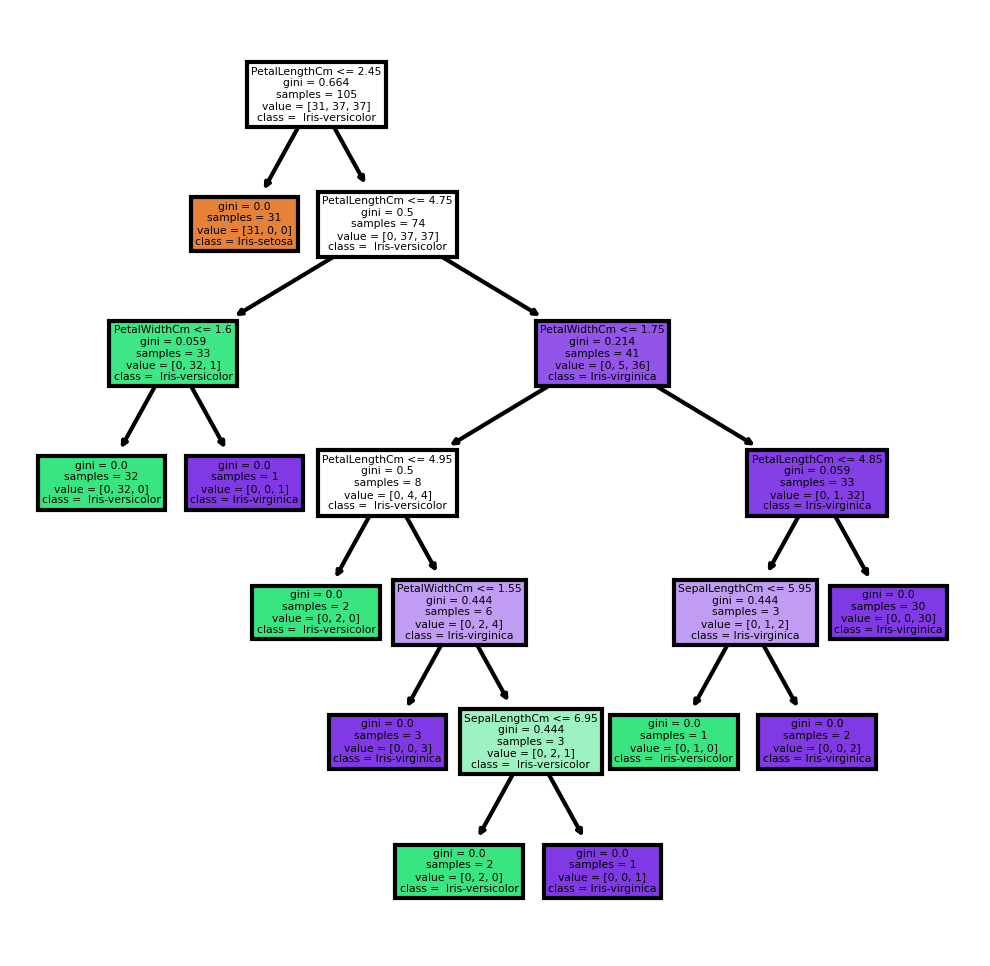

In [ ]:
feature_names = ['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']
target_names = ['Iris-setosa', ' Iris-versicolor', 'Iris-virginica']

#Tamaño de los árboles
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

# Crear los datos
tree.plot_tree(classifier, filled=True,
                          feature_names=feature_names,
                          class_names=target_names)

fig.savefig('imagename.png')

Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred_decision_tree)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_pred_decision_tree)

1.0

# Segunda implementación (debido a que sale un Accuracy perfecto en el dataset Iris)

Abrimos data set Wine

In [ ]:
import pandas as pd # importar libreria

columns = ["Classification", "Alcohol","Malic acid","Ash","Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols"
 	,"Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copia de wine.data', names= columns).reset_index()
df1 = df1.drop(['index'], axis=1) # abrir el archivo de datos con los nombres dados para las columnas
df1.head() 

,Classification,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Verificamos columna de clasificación

In [ ]:
df1['Classification']

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Classification, Length: 178, dtype: int64

Obtenemos valores únicos de la columna de clasificación

In [ ]:
df1.Classification.unique()


array([1, 2, 3])

Para una interpretación más sencilla se reemplazaron las clasificaciones numéricas a categóricas

In [ ]:
df1.Classification.replace([0, 1, 3], ['Cultivar 1', 'Cultivar 2', 'Cultivar 3'], inplace=True)
df1.Classification

0      Cultivar 2
1      Cultivar 2
2      Cultivar 2
3      Cultivar 2
4      Cultivar 2
          ...    
173    Cultivar 3
174    Cultivar 3
175    Cultivar 3
176    Cultivar 3
177    Cultivar 3
Name: Classification, Length: 178, dtype: object

In [ ]:
#df1['Classification'].astype(str)


Separamos las variables de la variable target

In [ ]:
df_x = df1.drop(["Classification"], axis=1)
df_y = df1["Classification"]


# Print df_x first 5
df_x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Separamos entre training y test set

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

Construimos el clasificador

In [ ]:
classifier = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

# Train Decision Tree Classifer
classifier = classifier.fit(X_train, y_train)

Generar predicción

In [ ]:
test_pred_decision_tree = classifier.predict(X_test)


Obtenemos columna

In [ ]:
df1.columns

Index(['Classification', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

Graficamos el árbol de decisión

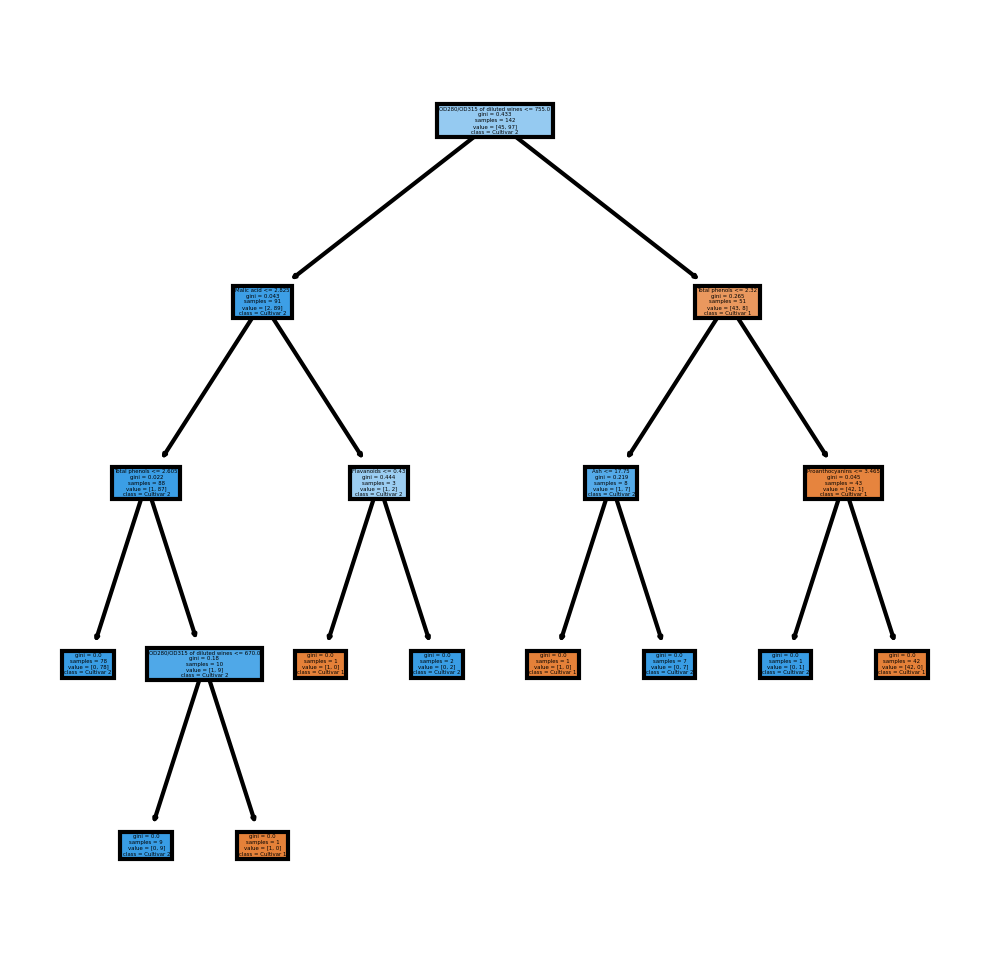

In [ ]:
feature_names = ['Classification', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']
target_names = ['Cultivar 1', 'Cultivar 2', 'Cultivar 3']

#Tamaño de los árboles
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

# Crear los datos
tree.plot_tree(classifier, filled=True,
                          feature_names=feature_names,
                          class_names=target_names)

fig.savefig('imagename.png')

Comparamos el valor actual con el predicho por el modelo

In [ ]:
test_pred_decision_tree_list = test_pred_decision_tree.tolist()

In [ ]:
for i in range(len(test_pred_decision_tree)):
  print('Real: ',test_pred_decision_tree_list[i],' | Pred: ', test_pred_decision_tree_list[i])

Real:  Cultivar 2  | Pred:  Cultivar 2
Real:  Cultivar 2  | Pred:  Cultivar 2
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 2  | Pred:  Cultivar 2
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 2  | Pred:  Cultivar 2
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 2  | Pred:  Cultivar 2
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 2  | Pred:  Cultivar 2
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 2  | Pred:  Cultivar 2
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 2  | Pred:  Cultivar 2
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 2  | Pred:  Cultivar 2
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 2  | Pred:  Cultivar 2
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 2  | Pred:  Cultivar 2
Real:  Cultivar 3  | Pred:  Cultivar 3
Real:  Cultivar 3  | Pred

Obtenemos matriz de confusión

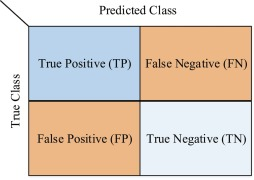

In [ ]:
cf_matrix = confusion_matrix(y_test, test_pred_decision_tree)
cf_matrix

array([[14,  0],
       [ 3, 19]])

Métrica Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_pred_decision_tree)

0.9166666666666666